In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "puglia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,16,Puglia,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,16,Puglia,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,16,Puglia,1,0,1,0,1,1,1,...,0.0,0.0,0.0,0.0,0.00,100.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,16,Puglia,1,0,1,2,3,2,2,...,0.0,242.0,0.0,2.0,0.00,33.33,0.83,0.00,0.00,200.00
4,2020-02-29T17:00:00,16,Puglia,1,0,1,2,3,0,0,...,0.0,10.0,0.0,0.0,0.00,33.33,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,2020-12-12T17:00:00,16,Puglia,1587,194,1781,49455,51236,1245,1478,...,43.0,10209.0,3790.0,1246.0,10.89,3.48,14.48,39.00,3.74,2.49
292,2020-12-13T17:00:00,16,Puglia,1547,191,1738,50408,52146,910,1175,...,23.0,7122.0,1924.0,953.0,10.99,3.33,16.50,61.07,-1.55,1.78
293,2020-12-14T17:00:00,16,Puglia,1551,184,1735,50297,52032,-114,656,...,24.0,4878.0,2908.0,-111.0,10.61,3.33,13.45,22.56,-3.66,-0.22
294,2020-12-15T17:00:00,16,Puglia,1530,187,1717,50558,52275,243,1023,...,54.0,10163.0,5540.0,261.0,10.89,3.28,10.07,18.47,1.63,0.47


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 16, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1388
Nuovi tamponi: 10188.0
Percentuale nuovi positivi/nuovi tamponi: 13.600000000000001 %
Nuovi guariti: 768.0
Nuovi deceduti: 45.0
Variazione positivi ricoverati con sintomi: -32.0
Variazione positivi in terapia intensiva: -2.0
Variazione positivi in isolamento dimiciliare: 609.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 12, 16, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-17T17:00:00,16,Puglia,368,33,401,4579,4980,307,350,...,2.0,5382.0,3639.0,258.0,8.23,8.05,6.50,9.62,26.92,6.57
1,2020-10-18T17:00:00,16,Puglia,377,36,413,4820,5233,253,301,...,3.0,4633.0,2098.0,241.0,8.72,7.89,6.50,14.35,9.09,5.08
2,2020-10-19T17:00:00,16,Puglia,397,38,435,5028,5463,230,321,...,4.0,2446.0,2098.0,208.0,8.74,7.96,13.12,15.30,5.56,4.40
3,2020-10-20T17:00:00,16,Puglia,432,39,471,5259,5730,267,295,...,3.0,5827.0,4471.0,231.0,8.28,8.22,5.06,6.60,2.63,4.89
4,2020-10-21T17:00:00,16,Puglia,438,42,480,5511,5991,261,324,...,2.0,5300.0,4620.0,252.0,8.75,8.01,6.11,7.01,7.69,4.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-12-12T17:00:00,16,Puglia,1587,194,1781,49455,51236,1245,1478,...,43.0,10209.0,3790.0,1246.0,10.89,3.48,14.48,39.00,3.74,2.49
57,2020-12-13T17:00:00,16,Puglia,1547,191,1738,50408,52146,910,1175,...,23.0,7122.0,1924.0,953.0,10.99,3.33,16.50,61.07,-1.55,1.78
58,2020-12-14T17:00:00,16,Puglia,1551,184,1735,50297,52032,-114,656,...,24.0,4878.0,2908.0,-111.0,10.61,3.33,13.45,22.56,-3.66,-0.22
59,2020-12-15T17:00:00,16,Puglia,1530,187,1717,50558,52275,243,1023,...,54.0,10163.0,5540.0,261.0,10.89,3.28,10.07,18.47,1.63,0.47


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

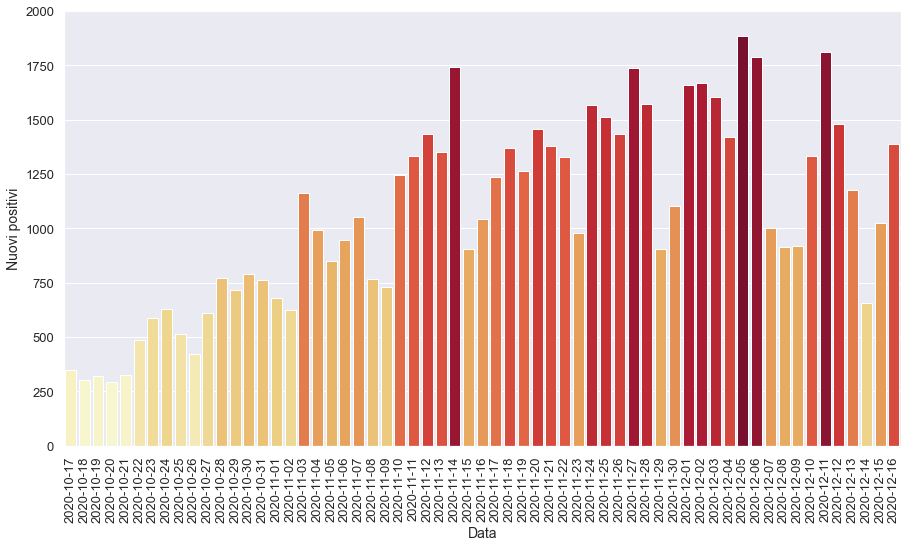

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

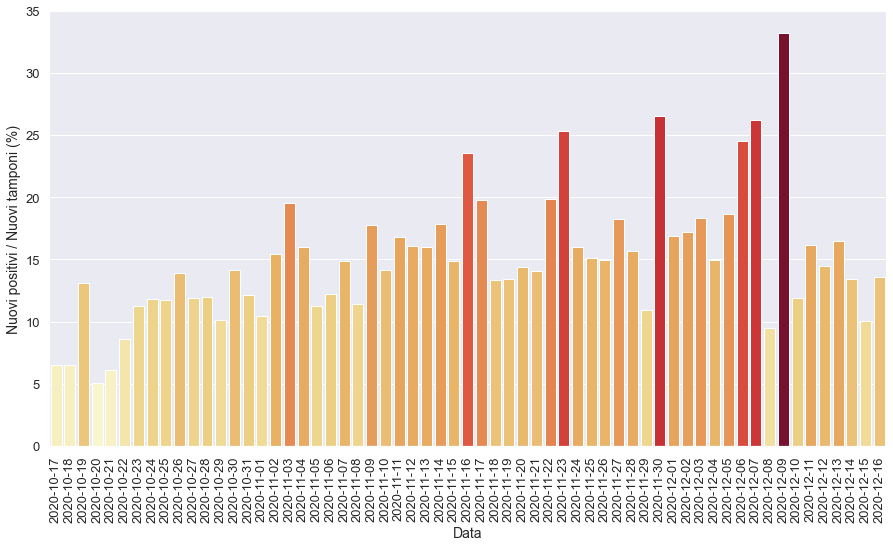

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

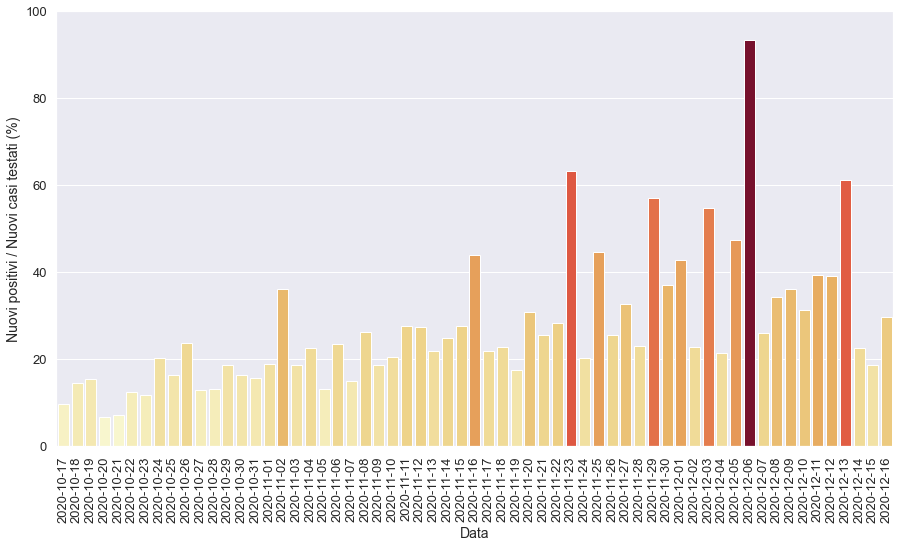

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

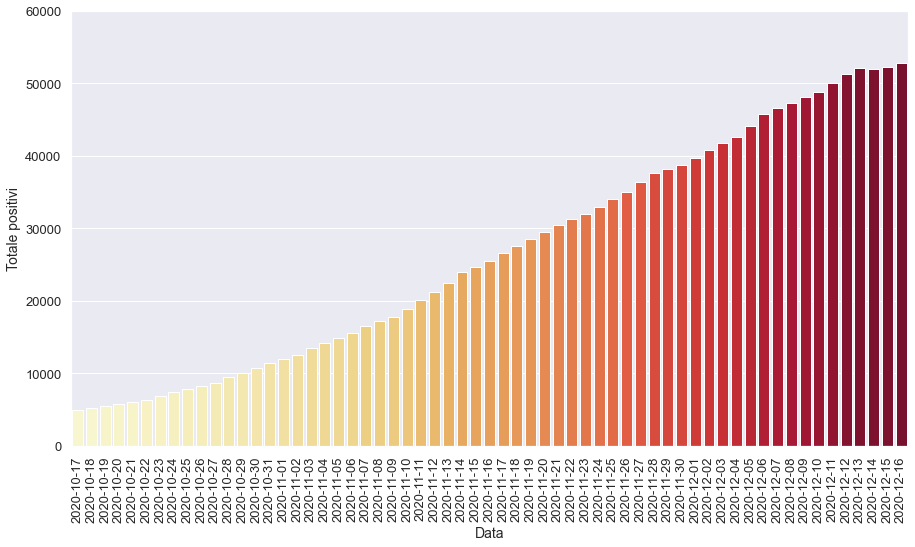

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

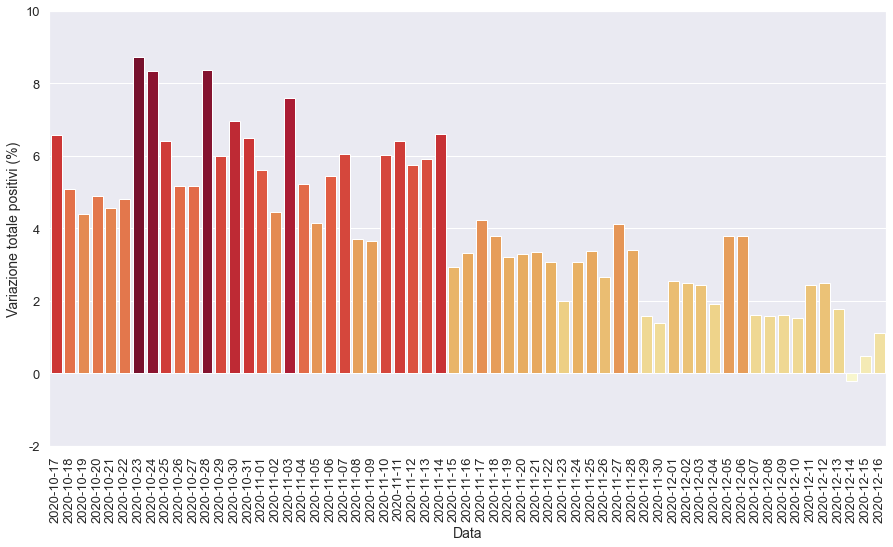

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

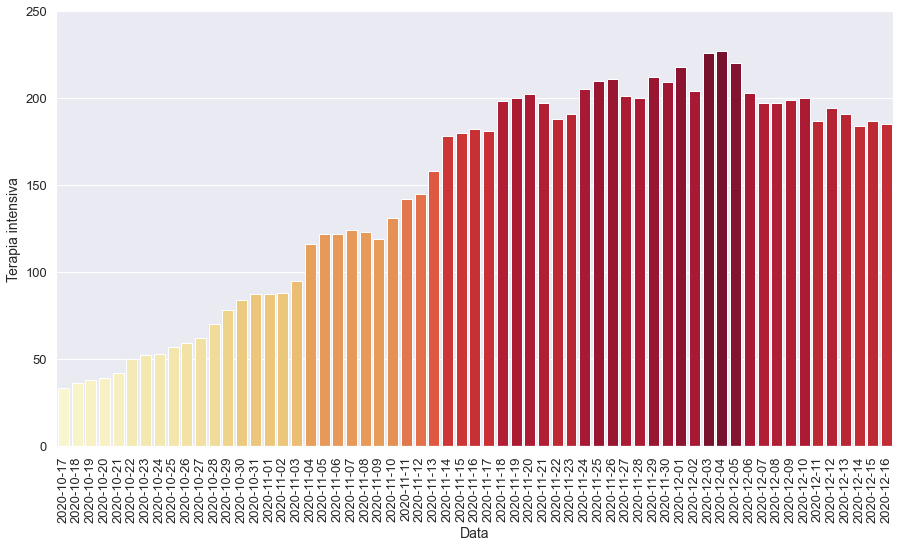

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

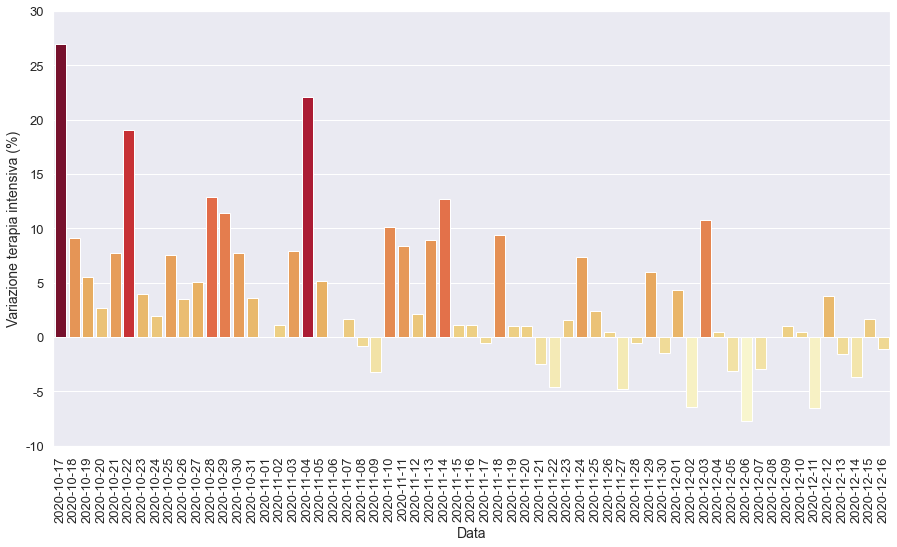

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

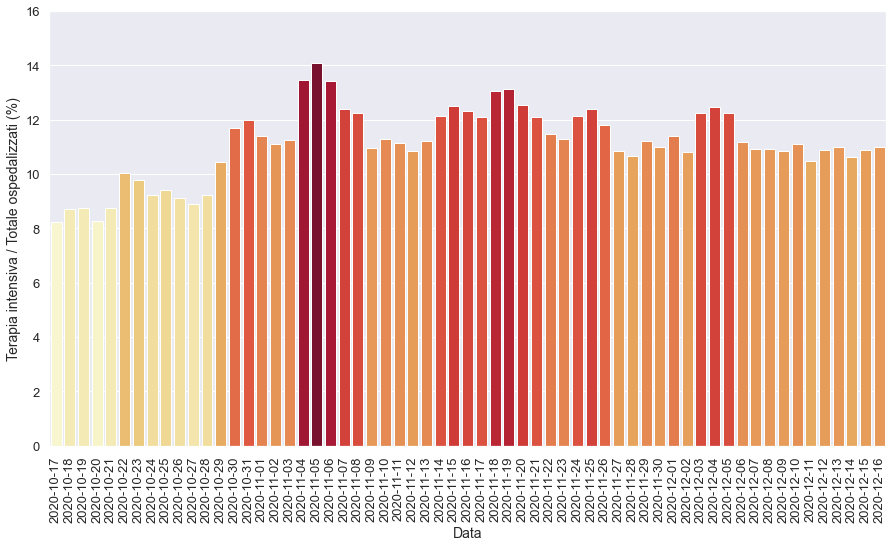

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

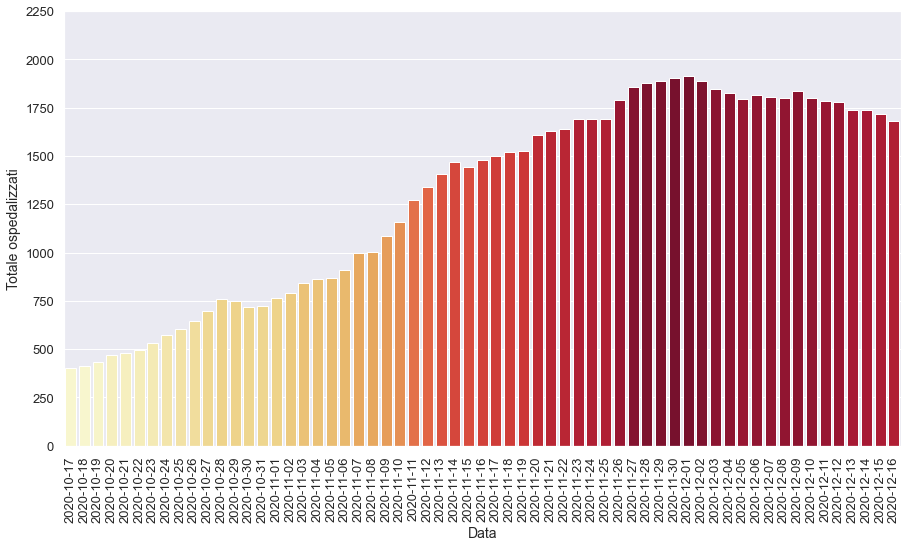

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

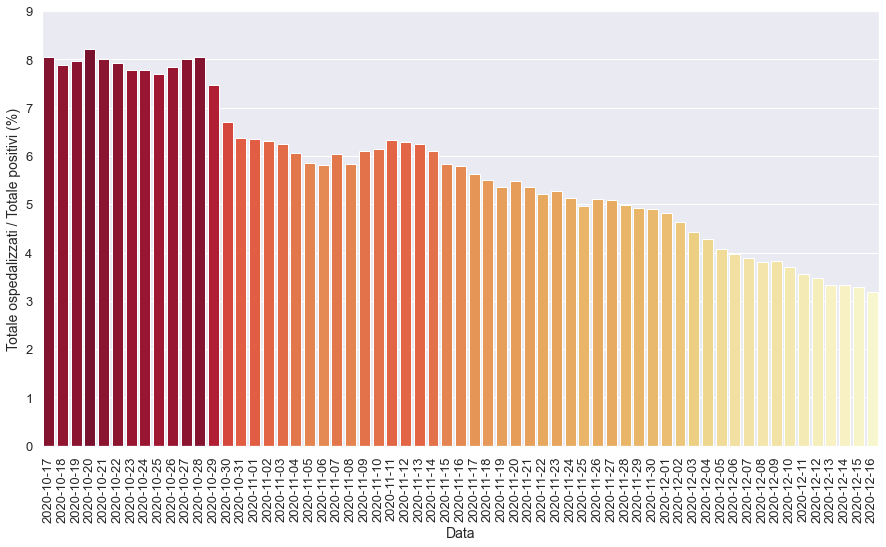

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

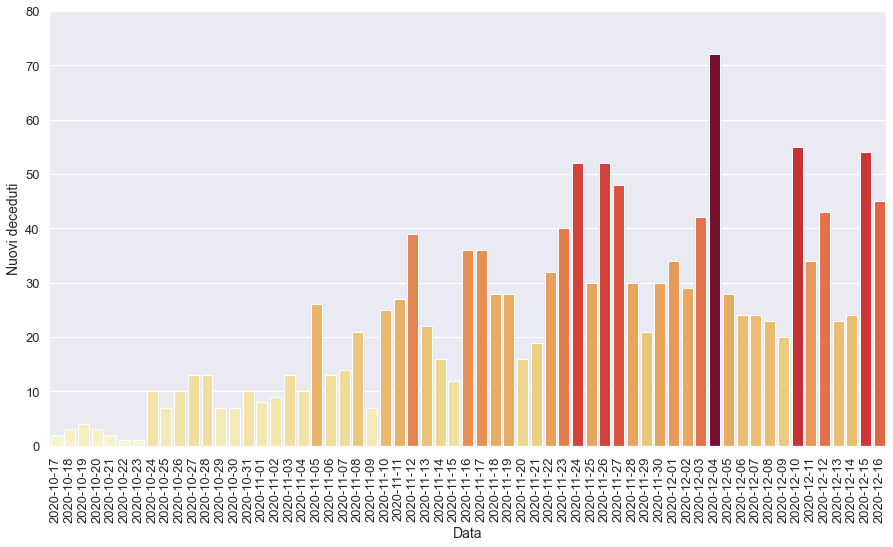

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

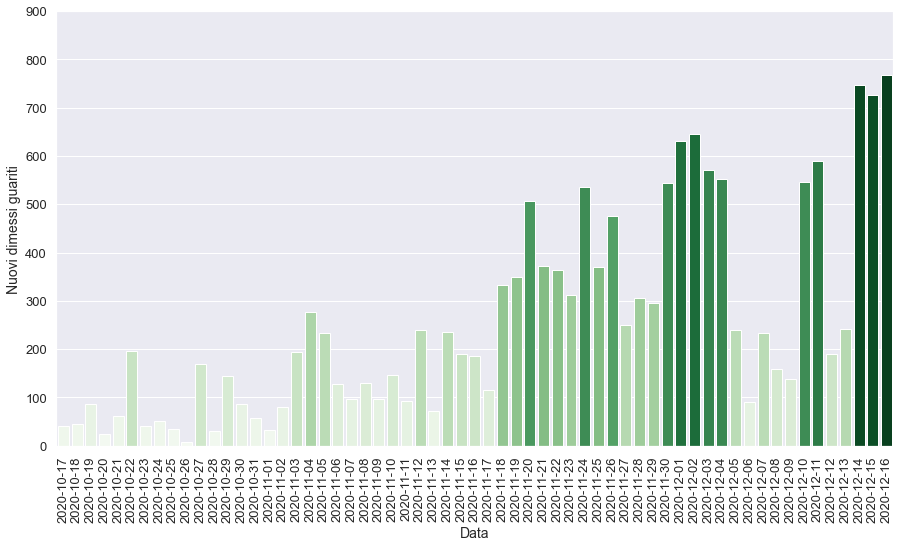

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-16T17:00:00,16,Puglia,1295,182,1477,24048,25525,823,1044,...,36.0,4425.0,2381.0,787.0,12.32,5.79,23.59,43.85,1.11,3.33
1,2020-11-17T17:00:00,16,Puglia,1316,181,1497,25110,26607,1082,1234,...,36.0,6228.0,5638.0,1062.0,12.09,5.63,19.81,21.89,-0.55,4.24
2,2020-11-18T17:00:00,16,Puglia,1320,198,1518,26096,27614,1007,1368,...,28.0,10265.0,6047.0,986.0,13.04,5.50,13.33,22.62,9.39,3.78
3,2020-11-19T17:00:00,16,Puglia,1324,200,1524,26976,28500,886,1263,...,28.0,9386.0,7292.0,880.0,13.12,5.35,13.46,17.32,1.01,3.21
4,2020-11-20T17:00:00,16,Puglia,1408,202,1610,27824,29434,934,1456,...,16.0,10102.0,4728.0,848.0,12.55,5.47,14.41,30.80,1.00,3.28
5,2020-11-21T17:00:00,16,Puglia,1432,197,1629,28791,30420,986,1377,...,19.0,9803.0,5414.0,967.0,12.09,5.36,14.05,25.43,-2.48,3.35
6,2020-11-22T17:00:00,16,Puglia,1449,188,1637,29715,31352,932,1327,...,32.0,6677.0,4703.0,924.0,11.48,5.22,19.87,28.22,-4.57,3.06
7,2020-11-23T17:00:00,16,Puglia,1499,191,1690,30289,31979,627,980,...,40.0,3869.0,1550.0,574.0,11.30,5.28,25.33,63.23,1.60,2.00
8,2020-11-24T17:00:00,16,Puglia,1485,205,1690,31269,32959,980,1567,...,52.0,9770.0,7779.0,980.0,12.13,5.13,16.04,20.14,7.33,3.06
9,2020-11-25T17:00:00,16,Puglia,1483,210,1693,32378,34071,1112,1511,...,30.0,9988.0,3398.0,1109.0,12.40,4.97,15.13,44.47,2.44,3.37


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

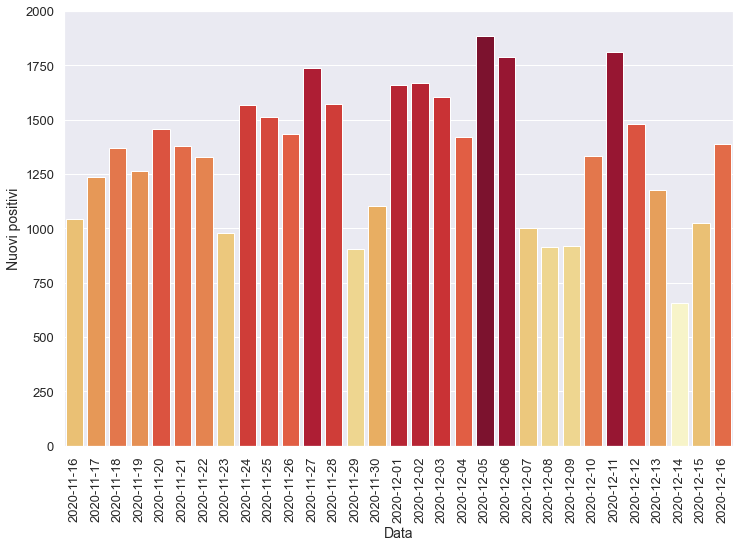

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

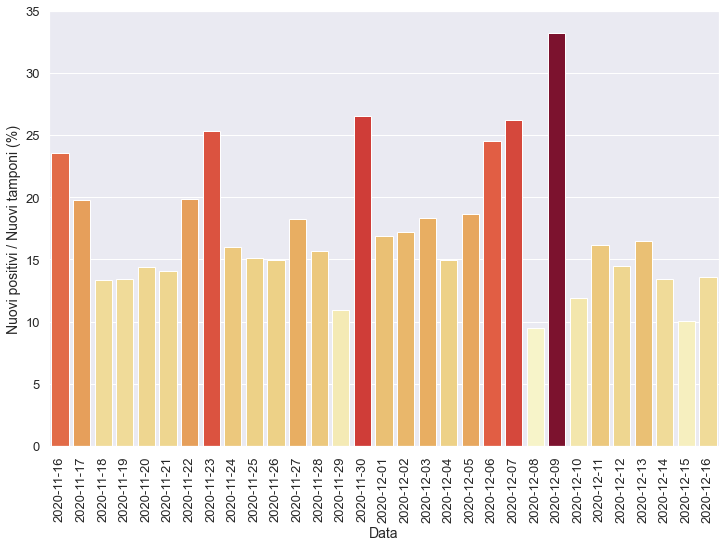

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

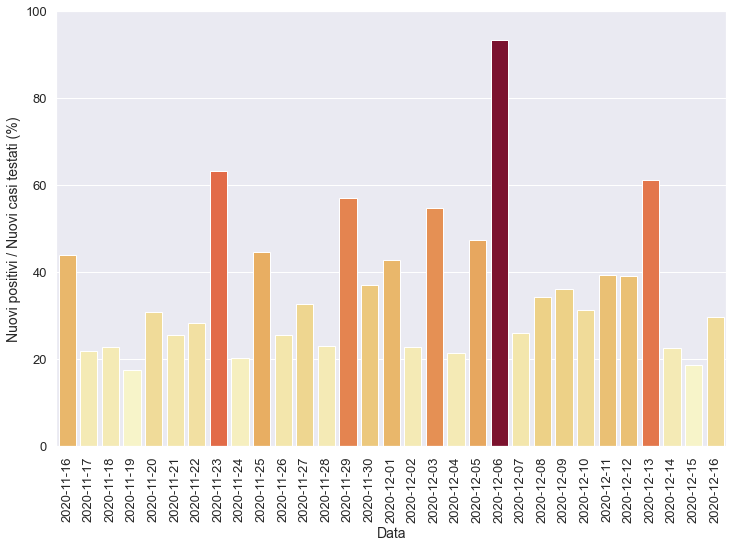

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

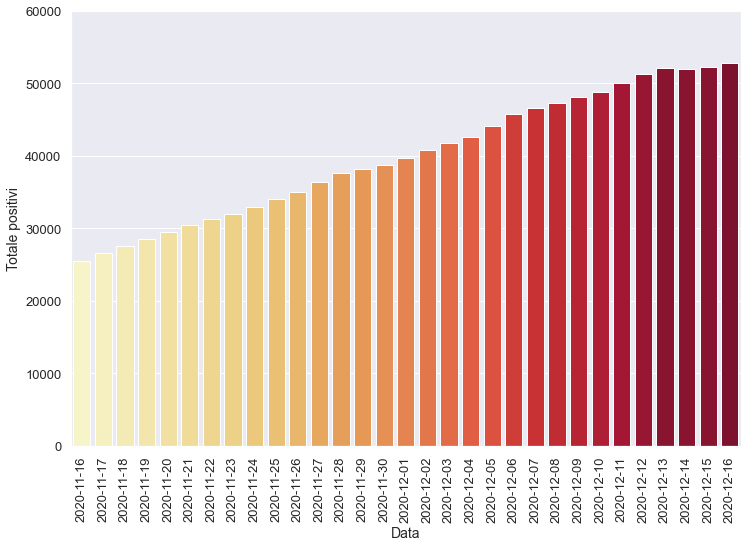

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

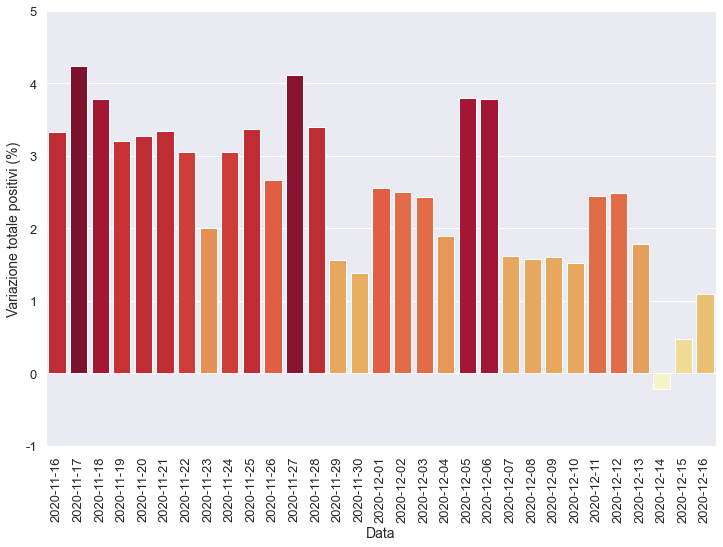

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

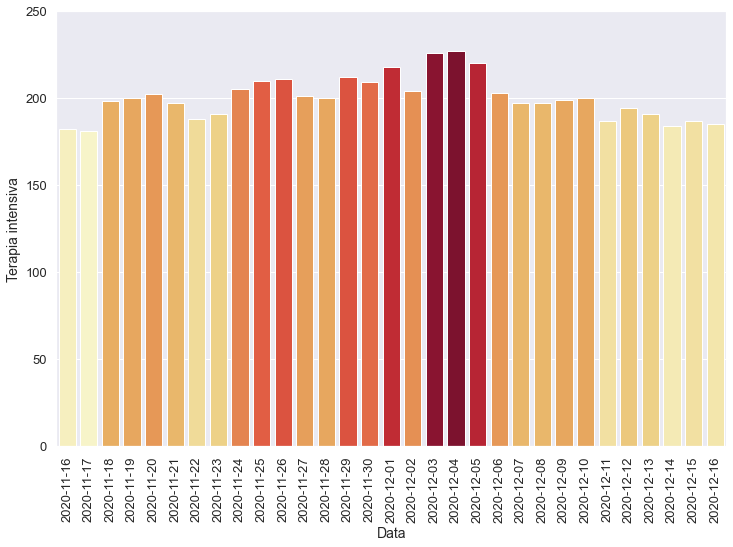

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

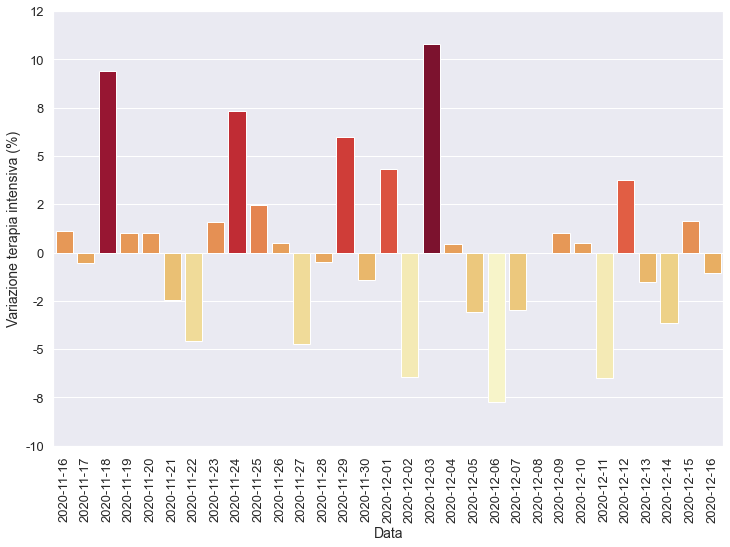

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

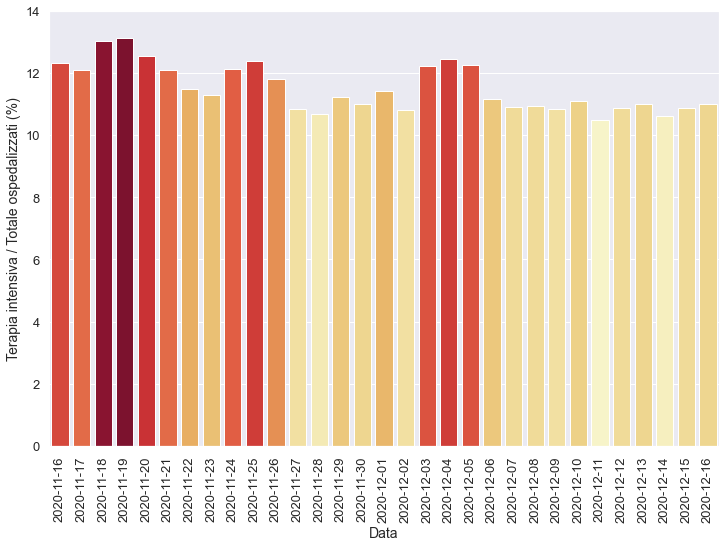

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

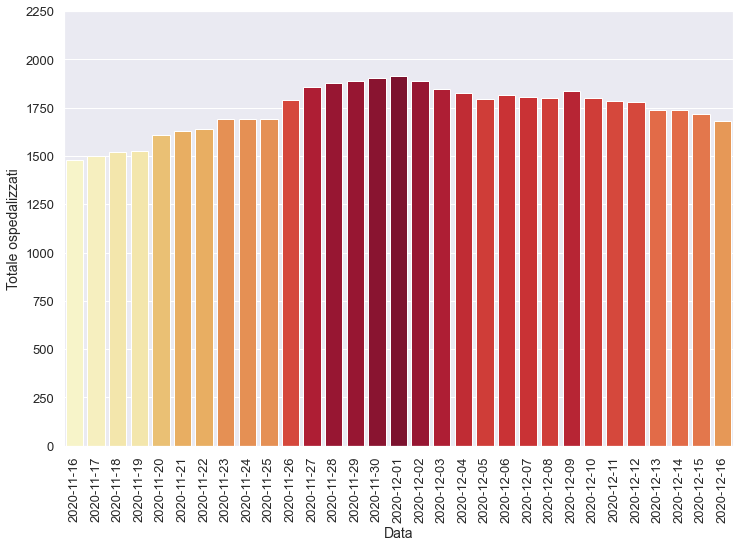

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

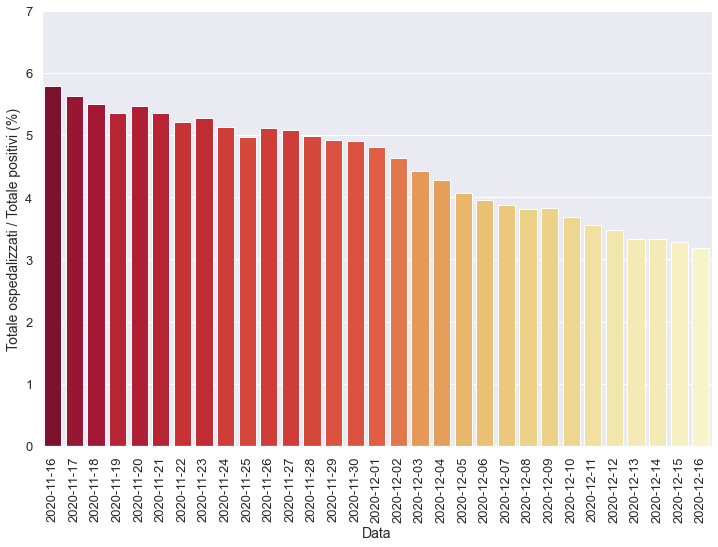

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

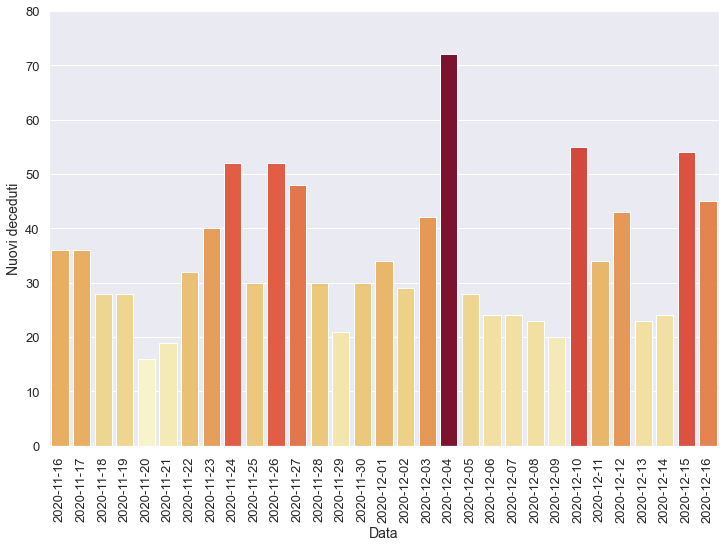

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

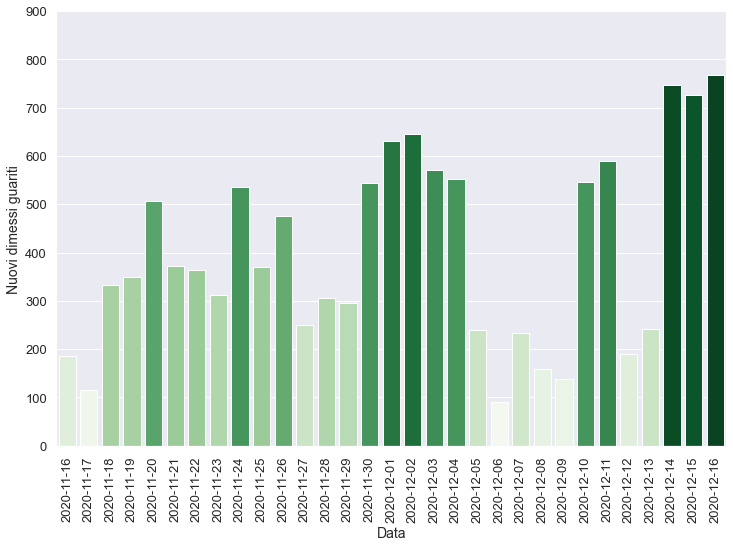

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-12-09T17:00:00,16,Puglia,1639,199,1838,46232,48070,758,917,...,20.0,2758.0,2542.0,722.0,10.83,3.82,33.25,36.07,1.02,1.60
1,2020-12-10T17:00:00,16,Puglia,1600,200,1800,47002,48802,732,1332,...,55.0,11168.0,4265.0,770.0,11.11,3.69,11.93,31.23,0.50,1.52
2,2020-12-11T17:00:00,16,Puglia,1595,187,1782,48209,49991,1189,1813,...,34.0,11223.0,4624.0,1207.0,10.49,3.56,16.15,39.21,-6.50,2.44
3,2020-12-12T17:00:00,16,Puglia,1587,194,1781,49455,51236,1245,1478,...,43.0,10209.0,3790.0,1246.0,10.89,3.48,14.48,39.00,3.74,2.49
4,2020-12-13T17:00:00,16,Puglia,1547,191,1738,50408,52146,910,1175,...,23.0,7122.0,1924.0,953.0,10.99,3.33,16.50,61.07,-1.55,1.78
5,2020-12-14T17:00:00,16,Puglia,1551,184,1735,50297,52032,-114,656,...,24.0,4878.0,2908.0,-111.0,10.61,3.33,13.45,22.56,-3.66,-0.22
6,2020-12-15T17:00:00,16,Puglia,1530,187,1717,50558,52275,243,1023,...,54.0,10163.0,5540.0,261.0,10.89,3.28,10.07,18.47,1.63,0.47
7,2020-12-16T17:00:00,16,Puglia,1498,185,1683,51167,52850,575,1388,...,45.0,10188.0,4673.0,609.0,10.99,3.18,13.62,29.70,-1.07,1.10


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

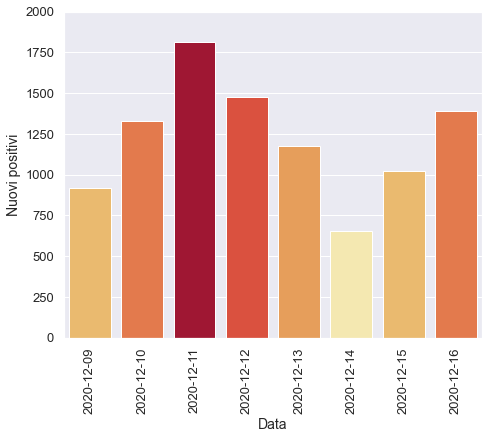

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

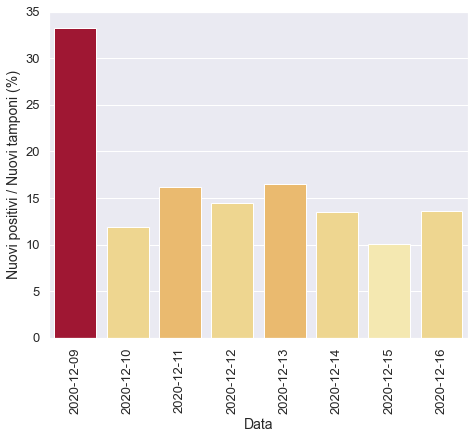

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

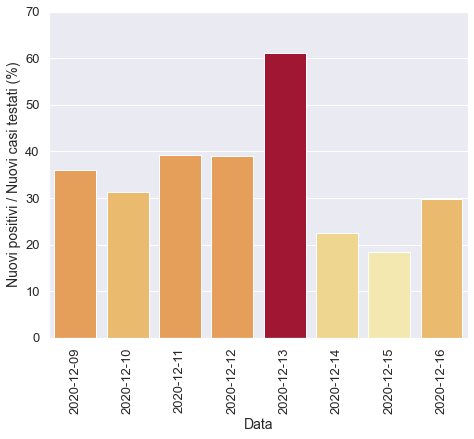

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

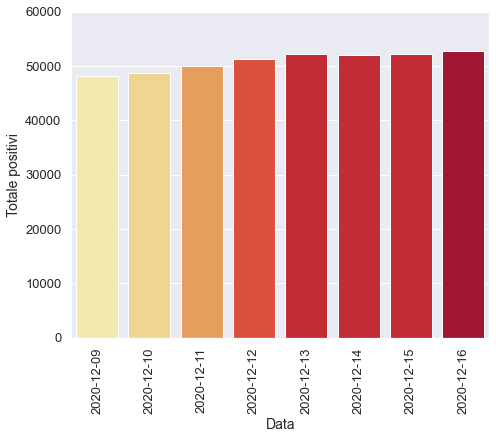

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

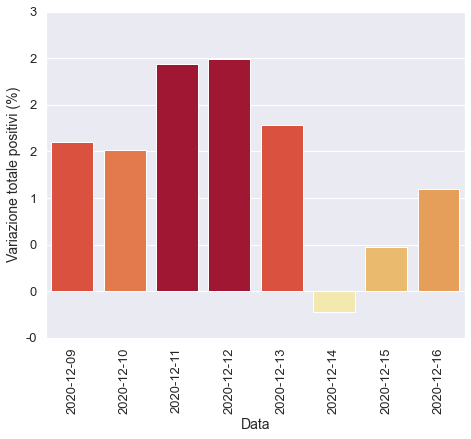

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

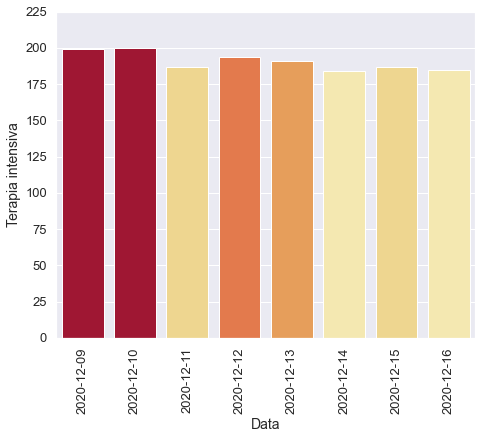

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

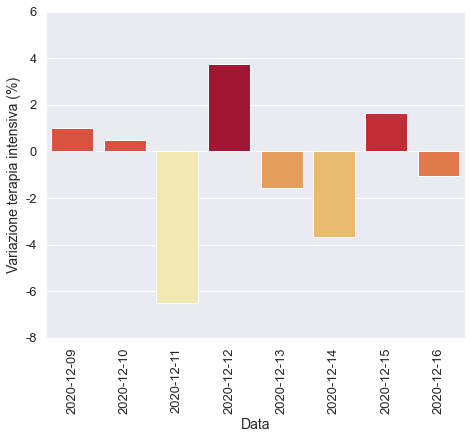

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

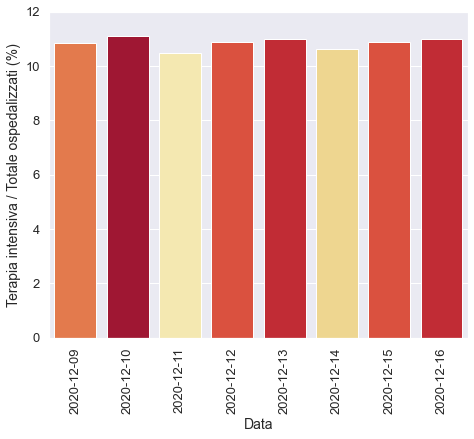

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

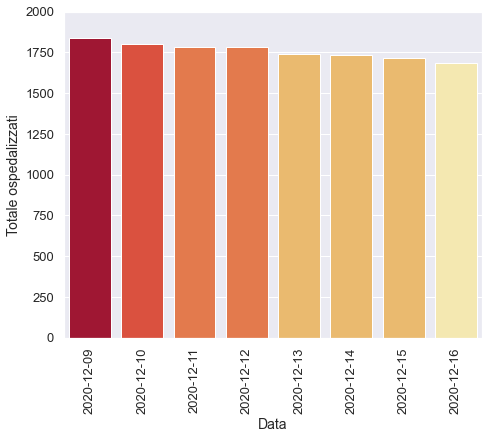

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

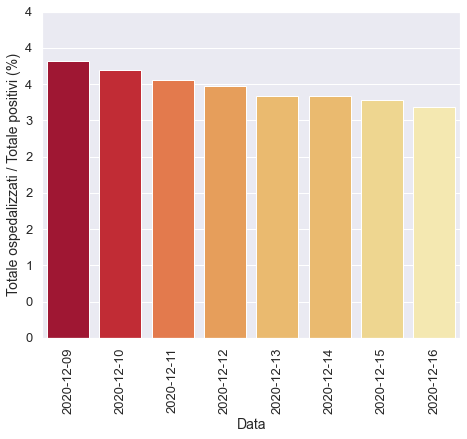

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

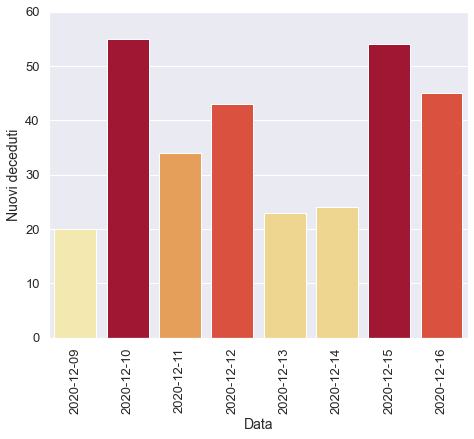

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

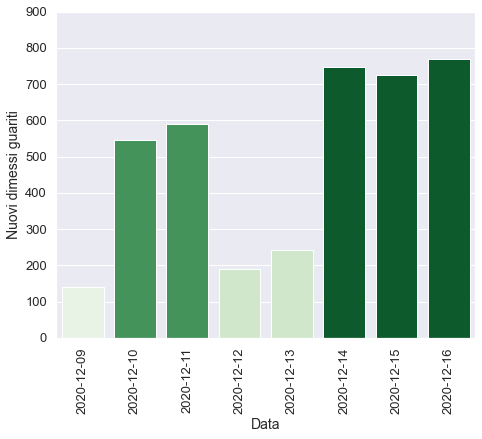

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)